In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
data=pd.read_csv('diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
#shape of dataset
data.shape

(53940, 10)

In [4]:
len(data['price'].value_counts())

11602

In [5]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
#finding null values using isnull()
data.isnull().sum()

# There is no null values in dataset

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<AxesSubplot:>

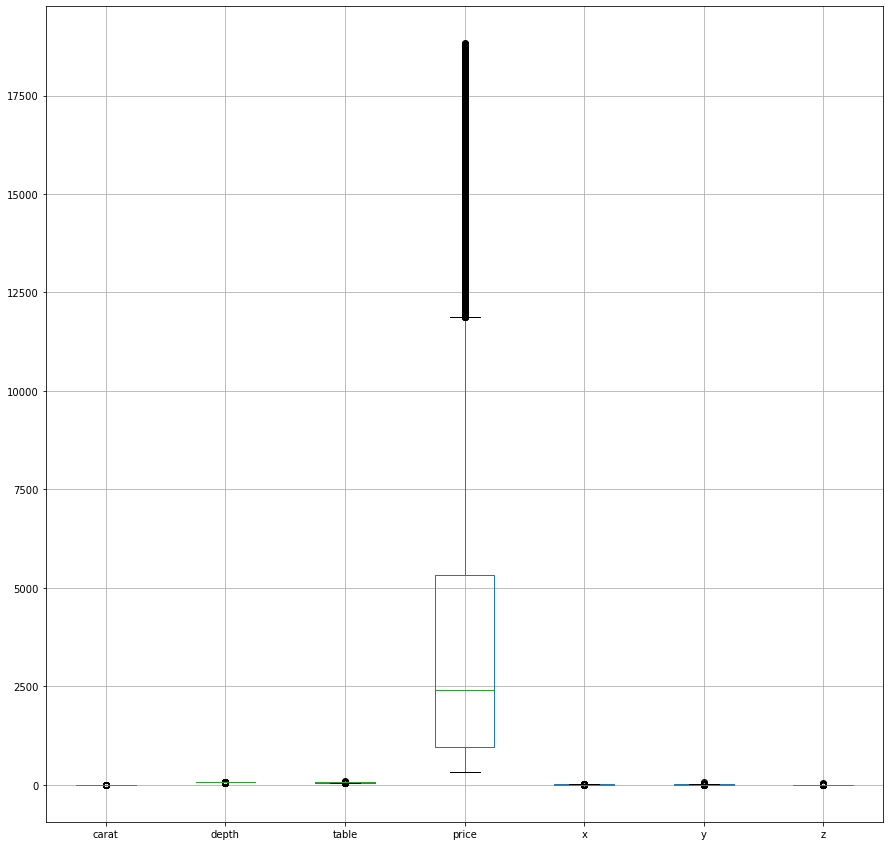

In [7]:
#checking the outliers by using box plot
data.boxplot(figsize=[15,15])

In [8]:
# The diamonds dataset have more outliers in price column 

In [9]:
# removing outliers using IQR 
q1=data['price'].quantile(0.25)
q3=data['price'].quantile(0.75)
iqr=q3-q1
l_bound=q1 - 1.5 * iqr
u_bound=q3 + 1.5 *iqr
df_final=data[~((data['price']<l_bound) | (data['price']>u_bound))]

<AxesSubplot:>

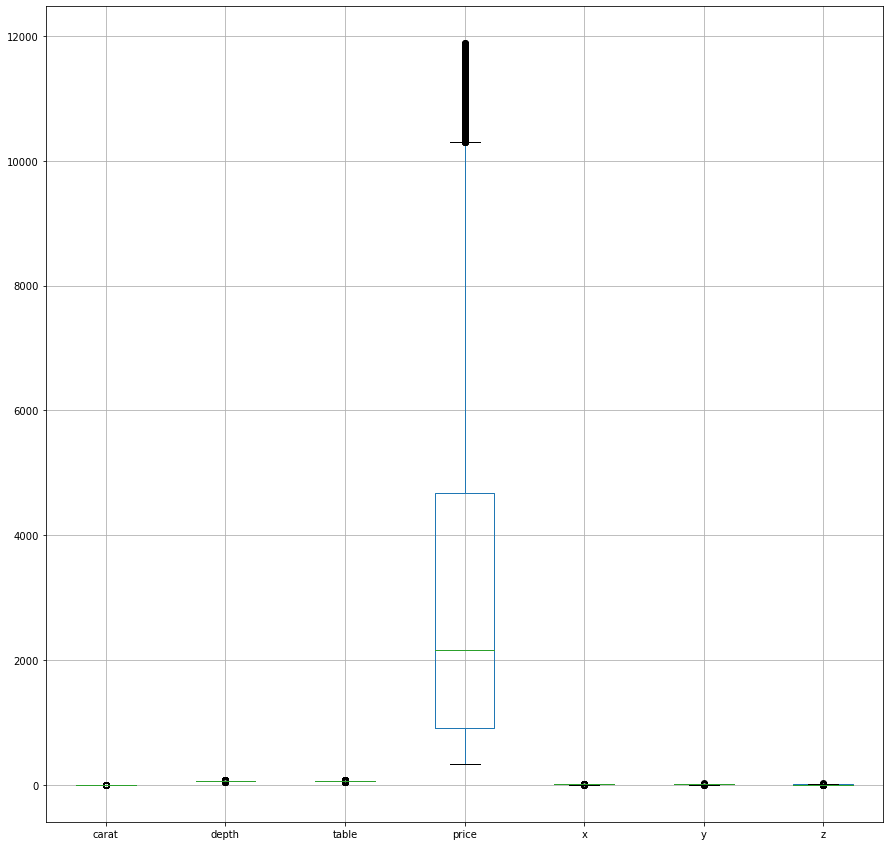

In [10]:
# After removing outliers we can see the dataset by using boxplot
df_final.boxplot(figsize=(15,15))

In [11]:
df_final.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
df_final.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df_final['cut'].value_counts()

Ideal        20392
Premium      12533
Very Good    11325
Good          4641
Fair          1509
Name: cut, dtype: int64

In [14]:
# Converting Categorical columns into Numerical using LABEL ENCODER 
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_final['cut']=lb.fit_transform(df_final['cut'])
df_final['color']=lb.fit_transform(df_final['color'])
df_final['clarity']=lb.fit_transform(df_final['clarity'])

In [15]:
#After converting Categorical columns into Numerical 
df_final.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:>

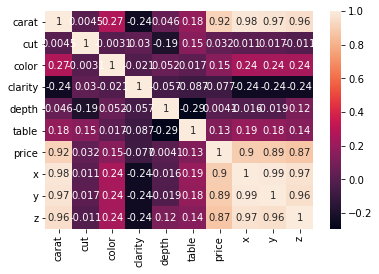

In [16]:
# Heatmap to see the correlation between columns
sns.heatmap(df_final.corr(),annot=True)

In [17]:
df_final.shape

(50400, 10)

In [18]:
# MINMAXSCALER
# MinMaxScaler is used to convert different Scale of values into one scale
# And used to Normalise the data

from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
for i in df_final.columns:
    if i!='price':
        df_final[i]=mx.fit_transform(df_final[[i]])

In [19]:
# After Normalising the data

df_final.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.008696,0.50,0.166667,0.428571,0.513889,0.333333,326,0.414046,0.125157,0.076415
1,0.002899,0.75,0.166667,0.285714,0.466667,0.500000,326,0.407757,0.120755,0.072642
2,0.008696,0.25,0.166667,0.571429,0.386111,0.611111,327,0.424528,0.127987,0.072642
3,0.026087,0.75,0.833333,0.714286,0.538889,0.416667,334,0.440252,0.133019,0.082704
4,0.031884,0.25,1.000000,0.428571,0.563889,0.416667,335,0.454927,0.136792,0.086478


In [20]:
# Separating the dataset into X and Y
# HERE  X consists of Independent data
x=df_final.drop('price',1)
x.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.008696,0.50,0.166667,0.428571,0.513889,0.333333,0.414046,0.125157,0.076415
1,0.002899,0.75,0.166667,0.285714,0.466667,0.500000,0.407757,0.120755,0.072642
2,0.008696,0.25,0.166667,0.571429,0.386111,0.611111,0.424528,0.127987,0.072642
3,0.026087,0.75,0.833333,0.714286,0.538889,0.416667,0.440252,0.133019,0.082704
4,0.031884,0.25,1.000000,0.428571,0.563889,0.416667,0.454927,0.136792,0.086478


In [21]:
# Here Y consistes of Dependent data
y=df_final.price
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [22]:
# Spliting the data into train & test  using train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=True)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

40320
10080
40320
10080


In [23]:
# Importing KNeighborsRegressor Algorithm 
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
knn.fit(x_test,y_test)
y_test_pred=knn.predict(x_test)





In [24]:
from sklearn.metrics import r2_score

In [25]:
# Predicting train and test
print('train prediction:',r2_score(y_train,y_train_pred))
print('test prediction:',r2_score(y_test,y_test_pred))

train prediction: 0.9801309947079483
test prediction: 0.9657548638011025


In [26]:

for k in range(1,20):
    knn1=KNeighborsRegressor(n_neighbors=k)
    knn1.fit(x_train,y_train)
    y_train_pred=knn1.predict(x_train)
    knn1.fit(x_test,y_test)
    y_test_pred=knn1.predict(x_test)



In [27]:
print('train prediction:',r2_score(y_train,y_train_pred))
print('test prediction:',r2_score(y_test,y_test_pred))

train prediction: 0.9637627935147361
test prediction: 0.9266251508460548


In [28]:
df=pd.DataFrame({'y_train':y_train,'y_train_pred':y_train_pred})

In [29]:
df.head()

,y_train,y_train_pred
16422,6559,6938.263158
40759,1163,1001.052632
28213,666,687.894737
52998,2596,2776.526316
48316,536,670.210526


In [30]:
df_test=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_pred})

In [31]:
df_test.head()

,y_test,y_test_pred
51037,2329,2382.315789
5255,3792,3960.684211
38196,1015,1999.947368
15256,6126,6294.315789
48431,1974,1853.210526
